In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
import pandas as pd
import csv
train_pth = '../train.csv'
negative = []
positive = []
with open(train_pth, "r") as f:
    read = csv.reader(f)
    for i in read:
        print(i)
        break    
    for r in read:
        if r[4] == "0":
            negative.append(r)
        if r[4] == "1":
            positive.append(r)
    print("negative:",len(negative))
    print("positive:",len(positive))


['id', 'keyword', 'location', 'text', 'target']
negative: 4342
positive: 3271


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


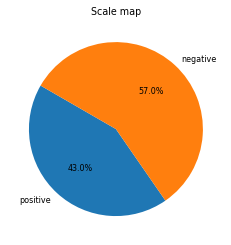

In [4]:
import matplotlib.pyplot as plt
import matplotlib 
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams.update({'font.size': 8}) 
labels = ['positive','negative']
sizes = [3271,4342]
explode = (0,0)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title("Scale map")
plt.show()

In [5]:
k1 = []
k2 = []
k12 = []
with open(train_pth, "r") as f:
    read = csv.reader(f)
    for i in read:
        print(i)
        break    
    for r in read:
        if r[1] != "":
            k1.append(r)
        if r[2] != "":
            k2.append(r)
        if r[1] != "" and r[2] != "":
            k12.append(r)
    print("k1:",len(k1))
    print("k2:",len(k2))
    print("k12",len(k12))

['id', 'keyword', 'location', 'text', 'target']
k1: 7552
k2: 5080
k12 5080


In [6]:
k1_1 = []
k1_0 = []
k2_0 = []
k2_1 = []
for i in k1:
    if int(i[4]) == 1:
        k1_1.append(i)
    if int(i[4]) == 0:
        k1_0.append(i)
print("k1_1:",len(k1_1))
print("k1_0:",len(k1_0))
for j in k2:
    if int(j[4]) == 1:
        k2_1.append(j)
    if int(j[4]) == 0:
        k2_0.append(j)
print("k2_0:",len(k2_0))
print("k2_1:",len(k2_1))

k1_1: 3229
k1_0: 4323
k2_0: 2884
k2_1: 2196


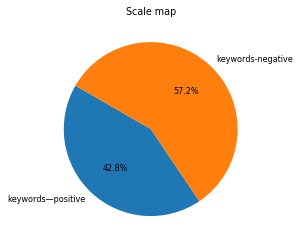

In [7]:
import matplotlib.pyplot as plt
import matplotlib 
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams.update({'font.size': 8}) 
labels = ['keywords—positive','keywords-negative']
sizes = [3229,4323]
explode = (0,0)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title("Scale map")
plt.show()

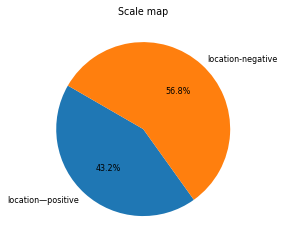

In [8]:
import matplotlib.pyplot as plt
import matplotlib 
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams.update({'font.size': 8}) 
labels = ['location—positive','location-negative']
sizes = [2196,2884]
explode = (0,0)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title("Scale map")
plt.show()

In [9]:
negative

[['23', '', '', "What's up man?", '0'],
 ['24', '', '', 'I love fruits', '0'],
 ['25', '', '', 'Summer is lovely', '0'],
 ['26', '', '', 'My car is so fast', '0'],
 ['28', '', '', 'What a goooooooaaaaaal!!!!!!', '0'],
 ['31', '', '', 'this is ridiculous....', '0'],
 ['32', '', '', 'London is cool ;)', '0'],
 ['33', '', '', 'Love skiing', '0'],
 ['34', '', '', 'What a wonderful day!', '0'],
 ['36', '', '', 'LOOOOOOL', '0'],
 ['37', '', '', "No way...I can't eat that shit", '0'],
 ['38', '', '', 'Was in NYC last week!', '0'],
 ['39', '', '', 'Love my girlfriend', '0'],
 ['40', '', '', 'Cooool :)', '0'],
 ['41', '', '', 'Do you like pasta?', '0'],
 ['44', '', '', 'The end!', '0'],
 ['49',
  'ablaze',
  'Est. September 2012 - Bristol',
  'We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw',
  '0'],
 ['52',
  'ablaze',
  'Philadelphia, PA',
  'Crying out for more! Set me ablaze',
  '0'],
 ['53',
  'ablaze',
  'London, UK',
  'On plus side LOOK AT THE SKY LAST NIGHT IT WAS A

## BERT处理文本分类得STOA，我们需要查询一下。简单使用BERT finetune，后期处理数据中异常表达~

In [10]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub
import tokenization

In [14]:
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
        text = text[:max_len-2]
        # 过长处理
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [15]:
def build_model(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    pooled, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    d = Dropout(0.1)(pooled)
    out = Dense(1, activation='sigmoid')(d)
    
    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [16]:
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1"
bert_layer = hub.KerasLayer(module_url, trainable=True)

In [18]:
train = pd.read_csv("../train.csv")
test = pd.read_csv("../test.csv")

In [19]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [20]:
train_input = bert_encode(train.text.values, tokenizer, max_len=160)
test_input = bert_encode(test.text.values, tokenizer, max_len=160)
train_labels = train.target.values

In [21]:
model_BERT = build_model(bert_layer, max_len=160)

In [22]:
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True)

train_history = model_BERT.fit(
     train_input, train_labels,
     validation_split = 0.01,
     epochs = 5, # recomended 3-5 epoch3
     callbacks=[checkpoint],
     batch_size = 32 )

Train on 7536 samples, validate on 77 samples
Epoch 1/5
7536/7536 [==============================] - 138s 18ms/sample - loss: 0.4448 - accuracy: 0.8060 - val_loss: 0.1598 - val_accuracy: 0.9610
Epoch 2/5
7536/7536 [==============================] - 127s 17ms/sample - loss: 0.3000 - accuracy: 0.8854 - val_loss: 0.1339 - val_accuracy: 0.9740
Epoch 3/5
7536/7536 [==============================] - 126s 17ms/sample - loss: 0.1766 - accuracy: 0.9359 - val_loss: 0.1743 - val_accuracy: 0.9481
Epoch 4/5
7536/7536 [==============================] - 125s 17ms/sample - loss: 0.0938 - accuracy: 0.9652 - val_loss: 0.2225 - val_accuracy: 0.9481
Epoch 5/5
7536/7536 [==============================] - 125s 17ms/sample - loss: 0.0575 - accuracy: 0.9780 - val_loss: 0.2459 - val_accuracy: 0.9351


In [23]:
test_pred = model_BERT.predict(test_input)
test_pred_int = test_pred.round().astype('int')

In [25]:
submission = pd.read_csv("../sample_submission.csv")
submission['target'] = test_pred_int
submission.head(10)

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


In [26]:
submission.to_csv('submission.csv', index=False)

###